In [3]:
import tensorflow_addons as tfa
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### 参考torch.optim.Adam

In [4]:
mnist = np.load("../../../../../Other/datasets/NumPy/mnist.npz")
X_train, y_train, X_test, y_test = tf.cast(tf.expand_dims(tf.constant(mnist['x_train']), -1), tf.float32), tf.constant(
    mnist['y_train']), tf.cast(
    tf.expand_dims(
        tf.constant(mnist['x_test']), -1), tf.float32), tf.constant(mnist['y_test'])

# 归一化
X_train, X_test = X_train / 255.0, X_test / 255.0

In [5]:
model = Sequential([
    layers.Conv2D(6, 3, activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='relu'),
])

In [6]:
'''
Adam默认参数:
tfa.optimizers.AdamW(
    weight_decay: Union[FloatTensorLike, Callable],
    learning_rate: Union[FloatTensorLike, Callable] = 0.001,
    beta_1: Union[FloatTensorLike, Callable] = 0.9,
    beta_2: Union[FloatTensorLike, Callable] = 0.999,
    epsilon: tfa.types.FloatTensorLike = 1e-07,
    amsgrad: bool = False,
    name: str = 'AdamW',
    **kwargs
)
'''
model.compile(optimizer=tfa.optimizers.AdamW(learning_rate=0.001,  # 对应torch.optim.AdamW lr参数
                                             weight_decay=0.01,  # 对应torch.optim.AdamW weight_decay参数
                                             beta_1=0.9, beta_2=0.999,  # 对应torch.optim.AdamW betas参数
                                             epsilon=1e-07),  # 对应torch.optim.AdamW eps参数
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 1.9614 - accuracy: 0.2488 - val_loss: 1.9461 - val_accuracy: 0.2436
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 1.9552 - accuracy: 0.2495 - val_loss: 1.9749 - val_accuracy: 0.2646
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 1.9537 - accuracy: 0.2485 - val_loss: 1.9310 - val_accuracy: 0.2587
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 1.9514 - accuracy: 0.2517 - val_loss: 1.9455 - val_accuracy: 0.2675
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 1.9516 - accuracy: 0.2501 - val_loss: 1.9514 - val_accuracy: 0.2715
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 1.9520 - accuracy: 0.2495 - val_loss: 1.9724 - val_accuracy: 0.2393
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 1.9546 - accuracy: 0.2487 - val_loss: 1.9785 - val_accu

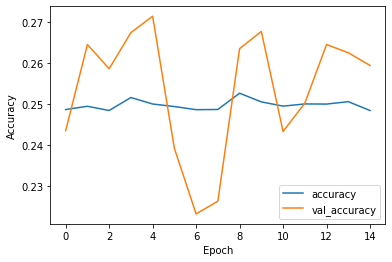

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4